# Two non-orthogonal states protocol (B92)
In this protocol we use two non orthogonal states from two basis(They can be any two basis, in this notebook we have chosen z and x). Asja encodes her randomly created, 0 in one of the state of rectilinear basis(Z_Basis) and 1 in the one of the state of Diagonal basis(X-Basis). And Balvis randomly generates basis for measuring the qubits, if the sent bit was in Z-Basis and he had measured in rectilinear basis then they would keep that bit(probability 1) , and if the sent bit was in horizontal and he measured it in Diagonal basis then they would discard that bit (probability 1/2). 
The states chosen for this protocol are oftenly:
 $$ \left| H \right\rangle  =  \left| 0 \right\rangle $$ 
 $$ \left| L \right\rangle  =  \frac{1}{\sqrt{2}}(\left| 0 \right\rangle + \left| 1 \right\rangle) $$ 

In [1]:


# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, assemble
from qiskit.quantum_info import Operator
from qiskit.circuit import Parameter
from qiskit.qasm3 import dumps
from qiskit_ibm_runtime import Sampler
from qiskit.compiler import transpile
from qiskit_aer import Aer
from random import randrange
from qiskit.primitives import BackendSampler
import hashlib 

def print_outcomes_in_reserve(counts): # takes a dictionary variable
    for outcome in counts: # for each key-value in dictionary
        reverse_outcome = ''
        for i in outcome: # each string can be considered as a list of characters
            reverse_outcome = i + reverse_outcome # each new symbol comes before the old symbol(s)
    return reverse_outcome

#Source for SendState: awards/teach_me_qiskit_2018/cryptography/Cryptography.ipynb

def SendState(qc1, qc2, qc1_name):
    ''' This function takes the output of a circuit qc1 (made up only of x and 
        h gates, simulate noisy quantum channel, where Pauli errors (X - bit flip; Z - phase flip
        will occur in qc2 and then initializes another circuit qc2 with introduce noise.
    ''' 
    
    # Quantum state is retrieved from qasm code of qc1
    qs = dumps(qc1).split(sep=';')[4:-1]
    print(qs)

    # Process the code to get the instructions
    for index, instruction in enumerate(qs):
        qs[index] = instruction.lstrip()

    
     # Parse the instructions and apply to new circuit
    for instruction in qs:
        if instruction[0] == 'x':
            if instruction[5] == '[':
                old_qr = int(instruction[6:-1])
            else:
                old_qr = int(instruction[5:-1])
            qc2.x(qreg[old_qr])
        elif instruction[0] == 'h':
            if instruction[5] == '[':
                old_qr = int(instruction[6:-1])
            else:
                old_qr = int(instruction[5:-1])
            qc2.h(qreg[old_qr])
        
        
       
        elif instruction[0] == 'm': # exclude measuring:
            pass
        else:
            raise Exception(f"Unable to parse instruction: {instruction}")

        

qreg = QuantumRegister(24) # quantum register with 8 qubits
creg = ClassicalRegister(24) # classical register with 8 bits

# Quantum circuit for Asja state
asja = QuantumCircuit(qreg, creg, name='Asja')

send=[] #Initial bit string to send
balvis_basis=[]
asja_basis=[]

#Creating random bit string
for i in range(24):
    bit = randrange(2)
    send.append(bit)
print("The bits Asja wants to send:     ",send)

asja_basis = ['X' if x==1 else "Z" if x==0  else x for x in send]
print("Asja Basis:        ",asja_basis)

for i in range(24):
    a_b = randrange(2)
    balvis_basis.append(a_b)
balvis_basis = ['X' if x==1 else "Z" if x==0  else x for x in balvis_basis]
print("Balvis Basis:        ",balvis_basis)








    


The bits Asja wants to send:      [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0]
Asja Basis:         ['Z', 'Z', 'Z', 'Z', 'Z', 'X', 'X', 'Z', 'X', 'X', 'Z', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'Z', 'X', 'X', 'X', 'Z', 'Z']
Balvis Basis:         ['X', 'Z', 'X', 'X', 'X', 'X', 'X', 'Z', 'X', 'X', 'X', 'X', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'X', 'X', 'X', 'Z', 'X', 'Z']


What gates should Asja apply to store bit 1 in the default qubit |0>?
A. X gate          B. H gate
C. X and H gate    D. Y gate

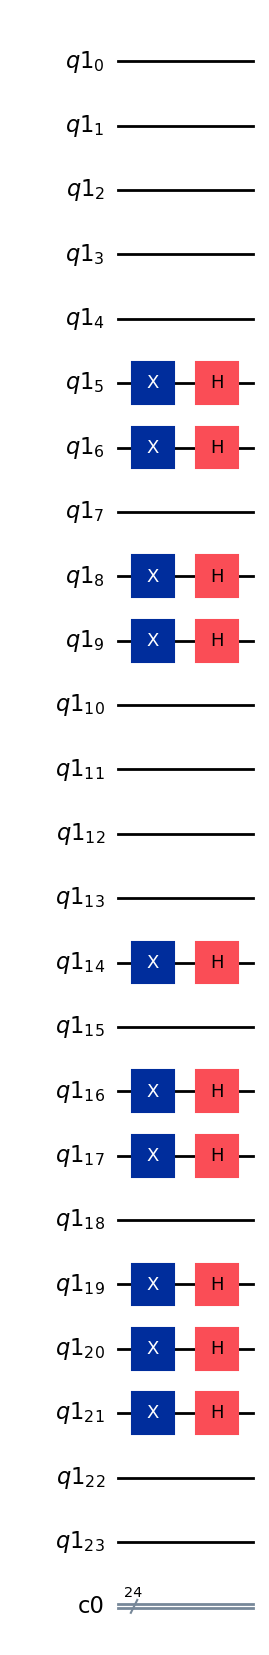

In [2]:
#Apply X gate if bit is equal to 1

for i, n in enumerate(send):
    if n==1:
        asja.x(qreg[i])
        asja.h(qreg[i]) # apply x-gate
    send_str = ''.join(str(e) for e in send)


asja.draw("mpl") #To check gates applied correctly

Balvis measuring the states in his randomly generated basis an then in computational basis.

In [3]:
balvis = QuantumCircuit(qreg, creg, name='Balvis') #Defining Balvis circuit
SendState(asja, balvis, 'Asja') #Asja sends states to Balvis


for i, k in enumerate(balvis_basis): 
    if k=='X':
        balvis.h(qreg[i])


balvis.draw("mpl")



balvis.measure(qreg,creg)

job = assemble(balvis)
result = Aer.get_backend('qasm_simulator').run(job).result()
counts = result.get_counts(balvis)
received = print_outcomes_in_reserve(counts)

print("Asja sent:", send_str)
print("Balvis received:", received)


['\nx q1[5]', '\nh q1[5]', '\nx q1[6]', '\nh q1[6]', '\nx q1[8]', '\nh q1[8]', '\nx q1[9]', '\nh q1[9]', '\nx q1[14]', '\nh q1[14]', '\nx q1[16]', '\nh q1[16]', '\nx q1[17]', '\nh q1[17]', '\nx q1[19]', '\nh q1[19]', '\nx q1[20]', '\nh q1[20]', '\nx q1[21]', '\nh q1[21]']
Asja sent: 000001101100001011011100
Balvis received: 000101101111001010111110


C:\Users\dell\AppData\Local\Temp\ipykernel_12576\3629667030.py:17: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = Aer.get_backend('qasm_simulator').run(job).result()


The sifted key Balvis and Asja would keep.

In [4]:
asja_key=[] #Asjas register for matching rounds
balvis_key=[] #Balvis register for matching rounds
for j in range(0,len(asja_basis)): #Going through list of bases 
    if asja_basis[j] == balvis_basis[j]: #Comparing
        asja_key.append(send[j])
        balvis_key.append(received[j]) #Keeping key bit if bases matched
    else:
        pass #Discard round if bases mismatched
balvis_key = [eval(i) for i in balvis_key]
print("Asjas key =", asja_key)
print("Balvis key =", balvis_key)
        

Asjas key = [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0]
Balvis key = [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0]


## Home work
#### How can we introduce Bit-FLip errors in this protocol?
### Hint
You can do some some changes in the sendstate function define in the first part of this protocol.

You can check the answer here.

[Answer](two_states_with_bit_flip_error.ipynb)